In [1]:
source('c:/users/tom/pycharmprojects/nyu-research/ts.R')

Warning message:
"package 'zoo' was built under R version 3.3.3"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Warning message:
"package 'forecast' was built under R version 3.3.3"

In [5]:
preprocessing_df <- function(ts, total, thres=5000){
  
  # removes rows with low observations and locfs them
  # returns time series and total time series, as a list
  
  df = time_index(data.frame(ts))
  df_total = time_index(data.frame(total))
  
  missing = df_total[,'tweets']<thres
  print(which(missing))
  df_total[missing, 'tweets'] <- NA
  df[missing,] <-NA
  df_total = na.locf(df_total[,'tweets'])
  df_filled = (na.locf(df[, ncol(df)]))
  
  return(list(series=df_filled, total=df_total))
}

In [2]:
ts.js <- function(jcsv, scsv){
    j_tob <- read.csv(jcsv)
    pres <- j_tob[c(1,2,3)]
    tot <- j_tob[c(1,2,4)]
    new <- preprocessing_df(pres, tot)
    ts_pres <- ts((new$series)[33:(672+32)], frequency=24)
    
    s_tob <- read.csv(scsv)
    spres <-s_tob[c(1,2,3)]
    stot <- s_tob[c(1,2,4)]
    snew <- preprocessing_df(spres, stot)
    ts_spres <- ts((snew$series)[9:(672+8)], frequency=24)
    return (ts(c((new$series)[33:(672+32)], (snew$series)[9:(672+8)]), frequency=24))}

In [56]:
ts.tot <- function(jcsv, scsv){
    j_tob <- read.csv(jcsv)
    pres <- j_tob[c(1,2,3)]
    tot <- j_tob[c(1,2,4)]
    new <- preprocessing_df(pres, tot)
    ts_pres <- ts((new$total)[33:(672+32)], frequency=24)
    
    s_tob <- read.csv(scsv)
    spres <-s_tob[c(1,2,3)]
    stot <- s_tob[c(1,2,4)]
    snew <- preprocessing_df(spres, stot)
    ts_spres <- ts((snew$total)[9:(672+8)], frequency=24)
    return (ts(c((new$total)[33:(672+32)], (snew$total)[9:(672+8)]), frequency=24))}

In [ ]:
ts.trends <- function(jcsv, scsv){
    j_tob <- read.csv(jcsv)
    pres <- j_tob[5]
    ts_pres <- ts((new$total)[33:(672+32)], frequency=24)
    
    s_tob <- read.csv(scsv)
    spres <-s_tob[c(1,2,3)]
    stot <- s_tob[c(1,2,4)]
    snew <- preprocessing_df(spres, stot)
    ts_spres <- ts((snew$total)[9:(672+8)], frequency=24)
    return (ts(c((new$total)[33:(672+32)], (snew$total)[9:(672+8)]), frequency=24))}

In [60]:
tob <- ts.js('c:/users/tom/documents/research/data/tob-current-june.csv', 
      'c:/users/tom/documents/research/data/tob-current-sept.csv')
alc <- ts.js('c:/users/tom/documents/research/data/alc-june.csv', 
      'c:/users/tom/documents/research/data/alc-sept.csv')
tot <- ts.tot('c:/users/tom/documents/research/data/alc-june.csv', 
      'c:/users/tom/documents/research/data/alc-sept.csv')
alc <- alc/tot
tob <- tob/tot
alc <- alc/mean(alc)
tob <- tob/mean(tob)

 [1]   2   3   4   5   6   7  26  27  28  29  30  31 721 722 723
 [1] 408 409 410 411 412 413 414 415 476 477 478 479 485 486 721 722 723 724 725
 [1]   2   3   4   5   6   7  26  27  28  29  30  31 721 722 723
 [1] 408 409 410 411 412 413 414 415 476 477 478 479 485 486 721 722 723 724 725
 [1]   2   3   4   5   6   7  26  27  28  29  30  31 721 722 723
 [1] 408 409 410 411 412 413 414 415 476 477 478 479 485 486 721 722 723 724 725


In [16]:
weekify <- function(ser){
    
ser.1 = as.numeric(window(ser, start=c(1, 1), end= c(7, 24)))
ser.2 = as.numeric(window(ser, start=c(8, 1), end= c(14, 24)))
ser.3 = as.numeric(window(ser, start=c(15, 1), end= c(21, 24)))
ser.4 = as.numeric(window(ser, start=c(22, 1), end= c(28, 24)))
ser.5 = as.numeric(window(ser, start=c(29, 1), end= c(35, 24)))
ser.6 = as.numeric(window(ser, start=c(36, 1), end= c(42,24)))
ser.7 = as.numeric(window(ser, start=c(43, 1), end= c(49, 24)))
ser.8 = as.numeric(window(ser, start=c(50, 1), end= c(56, 24)))
    return (data.frame(ser.1, ser.2, ser.3, ser.4, ser.5, ser.6, ser.7, ser.8))
    }

In [82]:
alc.df <- weekify(alc)
tob.df <- weekify(tob)
alc.trends <- weekify(trends_alc)

In [97]:

plot_series <- function(tob.df, cur.df, plot_max = 3){
    #     week_names = c('June 2-8', 'June 9-15', 'June 16-22', 'June 23-29', 'Sept 1-7', 'Sept 8-14', 'Sept 15-21', 'Sept 22-28')
        week_names = c('J1', 'J2', 'J3', 'J4', 'S1', 'S2','S3', 'S4')
    par(mfrow=c(8,1))
    # outer margin
    par(oma = c(5, 3, 5, 0))
    for (col in 1:8){
        # remove space for x-axis
        par(mar = c(0, 8, 0, 0))
        yrange = c(0, plot_max)
        plot(tob.df[, col], type='l', xaxt='n', col='blue', ylim=yrange, yaxt='n', ylab='')
        lines(cur.df[,col], col='red')
        # lines(shi.df[,col], col='steelblue')
        title(cex.lab =3, ylab=week_names[col], line=6)
        axis(2, at=c(0, plot_max /3, 2*plot_max /3), las = 1, cex.axis=2)
        abline(v=seq(1, 168, by=24), lty=2)

    
    mtext('Proportion of 8 Week Mean', cex=2, side = 2, outer = TRUE, line = 1)
mtext('Hour of Week (dotted lines at 8am local time)', cex=1.5, side = 1, outer = TRUE, line = 3)
axis(1, labels = c('Tu', 'W', 'Th', 'F', 'Sa', 'Su', 'M'), at=seq(1, 168, by=24), outer=TRUE)
    }
    par(xpd=NA)
    
}

In [121]:
shi <- ts.js('c:/users/tom/documents/research/data/shisha-june.csv', 
      'c:/users/tom/documents/research/data/shisha-sept.csv')
tot <- ts.tot('c:/users/tom/documents/research/data/alc-june.csv', 
      'c:/users/tom/documents/research/data/alc-sept.csv')
shi <- shi/tot
shi <- shi/mean(shi)
shi.df <- weekify(shi)
trends_shi.j <- read.csv('c:/users/tom/documents/research/data/June2015_Trends_hookah.csv')
trends_shi.s <- read.csv('c:/users/tom/documents/research/data/Sept2015_Trends_hookah.csv')
trends_shi <- ts(c(trends_shi.j[33:(672+32), 4], trends_shi.s[9:(672+8), 4]), frequency=24)
trends_shi <- trends_shi/mean(trends_shi)
shi.trends <- weekify(trends_shi)

pdf('c:/users/tom/documents/research/trends_plots/hookah.pdf',width=7,height=12,paper='special') 
plot_series(shi.df, shi.trends,  plot_max = 6)
legend(134,53,inset = 0,
        legend = c("Twitter", "Trends"), 
        col=c("steelblue", "red" ), pch=15, cex=1.1, horiz=TRUE)
dev.off()

 [1]   2   3   4   5   6   7  26  27  28  29  30  31 721 722 723
 [1] 408 409 410 411 412 413 414 415 476 477 478 479 485 486 721 722 723 724 725
 [1]   2   3   4   5   6   7  26  27  28  29  30  31 721 722 723
 [1] 408 409 410 411 412 413 414 415 476 477 478 479 485 486 721 722 723 724 725


png 
  2

In [162]:
pdf('c:/users/tom/documents/research/trends_plots_week/hookah.pdf',width=7,height=4,paper='special') 
tw.week.avg <- apply(shi.df, FUN=mean, MARGIN=1) * 100
trend.week.avg <- apply(shi.trends, FUN=mean, MARGIN=1) * 100
plot.ts(tw.week.avg, xaxt='n', col="blue", ylim=c(0,500), ylab="avg. prop. of hookah related as % of mean",
        xlab='Hour of Week (dotted lines at 8am local time)')
lines(trend.week.avg, col='red')
axis(side=1, at=seq(1, 168, by=24), labels=c('T', 'W', 'Th', 'F', 'Sa', 'Su', 'M'))
abline(v=seq(1, 168+24, by=24), lty=2)
legend("topright", c('Twitter',  'Trends'), bg='white', col=c('blue', 'red'),
      cex = 1,  lty = c(1, 1))
dev.off()

png 
  2

In [130]:
alc <- ts.js('c:/users/tom/documents/research/data/alc-june.csv', 
      'c:/users/tom/documents/research/data/alc-sept.csv')
tot <- ts.tot('c:/users/tom/documents/research/data/alc-june.csv', 
      'c:/users/tom/documents/research/data/alc-sept.csv')
alc <- alc/tot
alc <- alc/mean(alc)
alc.df <- weekify(alc)

trends_alc.j <- read.csv('c:/users/tom/documents/research/data/June2015_Trends_alcohol.csv')
trends_alc.s <- read.csv('c:/users/tom/documents/research/data/Sept2015_Trends_alcohol.csv')
trends_alc <- ts(c(trends_alc.j[33:(672+32), 5], trends_alc.s[9:(672+8), 5]), frequency=24)
trends_alc <- trends_alc/mean(trends_alc)
alc.trends <- weekify(trends_alc)
pdf('c:/users/tom/documents/research/trends_plots/alc.pdf',width=7,height=12,paper='special') 
plot_series(alc.df, alc.trends,  plot_max = 1.8)
legend(134,15.9,inset = 0,
        legend = c("Twitter", "Trends"), 
        col=c("steelblue", "red" ), pch=15, cex=1.1, horiz=TRUE)
dev.off()

 [1]   2   3   4   5   6   7  26  27  28  29  30  31 721 722 723
 [1] 408 409 410 411 412 413 414 415 476 477 478 479 485 486 721 722 723 724 725
 [1]   2   3   4   5   6   7  26  27  28  29  30  31 721 722 723
 [1] 408 409 410 411 412 413 414 415 476 477 478 479 485 486 721 722 723 724 725


png 
  2

In [163]:
pdf('c:/users/tom/documents/research/trends_plots_week/alc.pdf',width=7,height=4,paper='special') 
tw.week.avg <- apply(alc.df, FUN=mean, MARGIN=1) * 100
trend.week.avg <- apply(alc.trends, FUN=mean, MARGIN=1) * 100
plot.ts(tw.week.avg, xaxt='n', col="blue", ylim=c(50,200), ylab="avg. prop. of alcohol related as % of mean",
        xlab='Hour of Week (dotted lines at 8am local time)')
lines(trend.week.avg, col='red')
axis(side=1, at=seq(1, 168, by=24), labels=c('T', 'W', 'Th', 'F', 'Sa', 'Su', 'M'))
abline(v=seq(1, 168+24, by=24), lty=2)
legend("topright", c('Twitter',  'Trends'), bg='white', col=c('blue', 'red'),
      cex = 1,  lty = c(1, 1))
dev.off()

png 
  2

In [23]:
library('TSclust')
library('factoextra')

Warning message:
"package 'TSclust' was built under R version 3.3.3"Loading required package: wmtsa
Warning message:
"package 'wmtsa' was built under R version 3.3.3"Loading required package: pdc
Warning message:
"package 'pdc' was built under R version 3.3.3"Loading required package: cluster
Warning message:
"package 'factoextra' was built under R version 3.3.3"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.3.3"

In [31]:
weeks = cbind(alc.df, tob.df)
head(weeks)

ser.1,ser.2,ser.3,ser.4,ser.5,ser.6,ser.7,ser.8,ser.1,ser.2,ser.3,ser.4,ser.5,ser.6,ser.7,ser.8
0.08872132,0.5385177,0.5055052,0.4394800,0.6519985,0.6148593,0.6107328,0.6519985,0.06968063,0.4529241,0.3484032,0.5574450,1.0103691,0.6619660,0.8013273,0.9406885
0.09903775,0.5818468,0.6602516,0.6189859,0.6870744,0.8335677,0.7200870,0.6664415,0.10452095,0.8710079,0.7316466,0.6271257,0.7664869,0.8710079,0.8013273,0.7664869
0.08253146,0.7262768,0.7221502,0.6478719,0.7799223,0.7943653,0.7365932,0.7778590,0.06968063,1.1148901,0.7316466,0.8710079,0.7664869,1.0800498,1.1497304,1.1497304
0.18156920,0.8789600,0.9573649,0.9078460,0.8026184,0.8459474,0.7696058,0.7923020,0.03484032,1.1148901,0.9406885,1.3239320,1.0800498,1.2542513,0.8013273,0.9406885
0.37551812,1.0502128,1.0646558,1.0275166,0.8830866,0.8521373,0.8562639,0.8521373,0.00000000,1.2194110,1.2194110,1.1497304,1.1497304,1.0452095,1.0800498,0.8013273
0.41472057,0.9965673,1.0605292,0.9243523,0.8315044,0.9140359,0.8005551,0.8273778,0.24388221,1.4284529,1.0103691,1.3239320,1.4284529,1.1148901,0.6619660,0.8013273


In [38]:
library(dendextend)

Warning message:
"package 'dendextend' was built under R version 3.3.3"
---------------------
Welcome to dendextend version 1.5.2
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
Or contact: <tal.galili@gmail.com>

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------


Attaching package: 'dendextend'

The following object is masked from 'package:stats':

    cutree



png 
  2

png 
  2

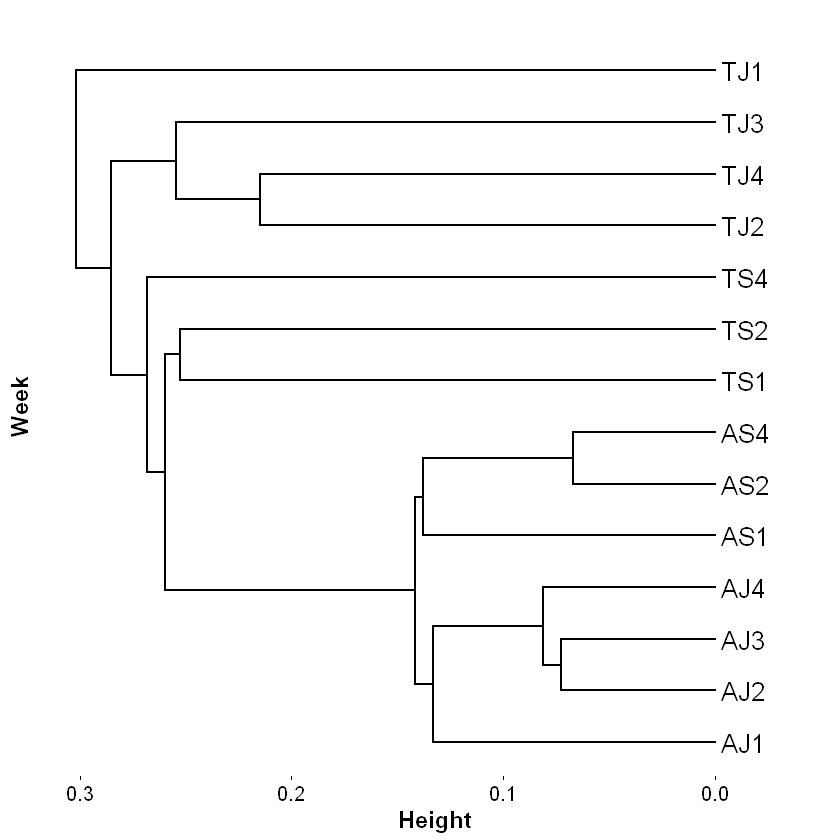

In [55]:
weeks = cbind(alc.df, tob.df)[c(1:6, 8, 9:14, 16)] # remove september days with weird data
colnames(weeks) = c('AJ1', 'AJ2', 'AJ3', 'AJ4', 'AS1', 'AS2','AS4', 'TJ1', 'TJ2', 'TJ3', 'TJ4', 'TS1', 'TS2','TS4')
dist = diss(t(apply(weeks, 2, normalize)), METHOD='EUCL')


par(mar=c(5.1,4.1,4.1,3.1))
a = agnes(dist)
a <- as.dendrogram(a)
pdf('c:/users/tom/documents/research/alc-tob-dend-col.pdf',width=7,height=4,paper='special') 
a %>% set("by_labels_branches_col", value = c('AJ1', 'AJ2', 'AJ3', 'AJ4', 'AS1', 'AS2','AS4')) %>% plot(las=1, horiz=TRUE, cex.lab=1.5, xlab='Height', ylab='Week')

dev.off()

p <- fviz_dend(a,  main='', ylab='Height', xlab='Week',  label_col='black', las=1, horiz=TRUE, cex=1.1) 
p <- p + theme(axis.title=element_text(size=14,face="bold"))
p
pdf('c:/users/tom/documents/research/alc-tob-dend.pdf',width=7,height=4,paper='special') 
p
dev.off()